# Imports

In [1]:
# Import the module
from gridworld_mdp import GridWorldMDP, create_classic_gridworld_env, create_custom_environment

# Configure matplotlib for inline plotting
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'

# Various Environments and Policies Hyperparams

## Classic 3x4 Grid World Example


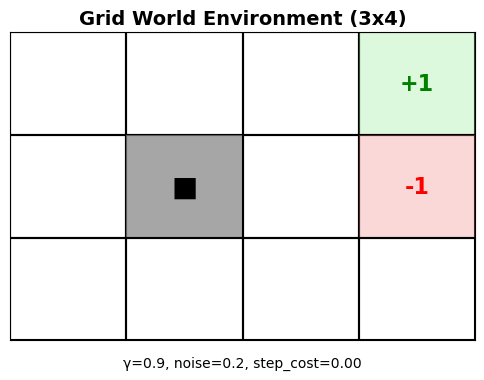

In [2]:
# Setup
ROWS = 3
COLS = 4
GAMMA = 0.9
NOISE = 0.2
TERMINALS = {(0, 3): +1, (1, 3): -1}
OBSTACLES = {(1, 1)}
STEP_COST = 0.0
FORMULA_TYPE = 'BERKELEY'

# Create environment
classic_gridworld = GridWorldMDP(
    rows=ROWS,
    cols=COLS,
    gamma=GAMMA,
    noise=NOISE,
    formula_type=FORMULA_TYPE
)
classic_gridworld.set_terminals(TERMINALS)
classic_gridworld.set_obstacles(OBSTACLES)
classic_gridworld.set_step_cost(STEP_COST)

classic_gridworld.plot_environment()

Converged in 63 iterations


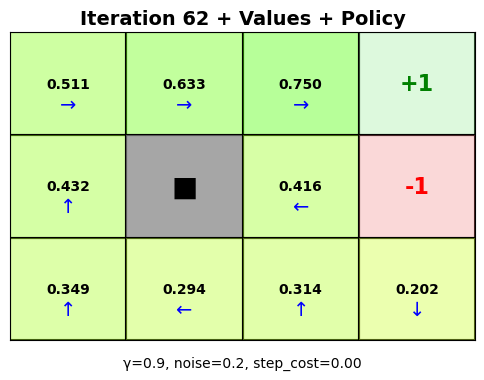

In [3]:
# Run value iteration
iterations = classic_gridworld.value_iteration()
print(f"Converged in {iterations} iterations")

classic_gridworld.plot_iteration(
    iterations-1,
    show_values=True,
    show_policy=True,
    show_qvalues=False
)

Converged in 100 iterations


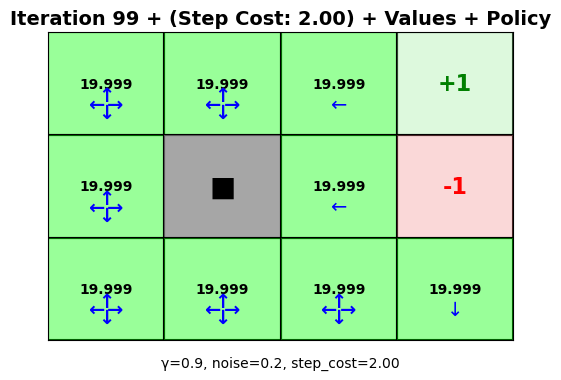

In [14]:
# Change the step cost, see how it affects the policy
NEW_STEP_COST = +2

classic_gridworld.set_step_cost(NEW_STEP_COST)

# Run value iteration
iterations = classic_gridworld.value_iteration()
print(f"Converged in {iterations} iterations")

classic_gridworld.plot_iteration(
    iterations-1,
    show_values=True,
    show_policy=True,
    show_qvalues=False
)

## Custom Grid World Example

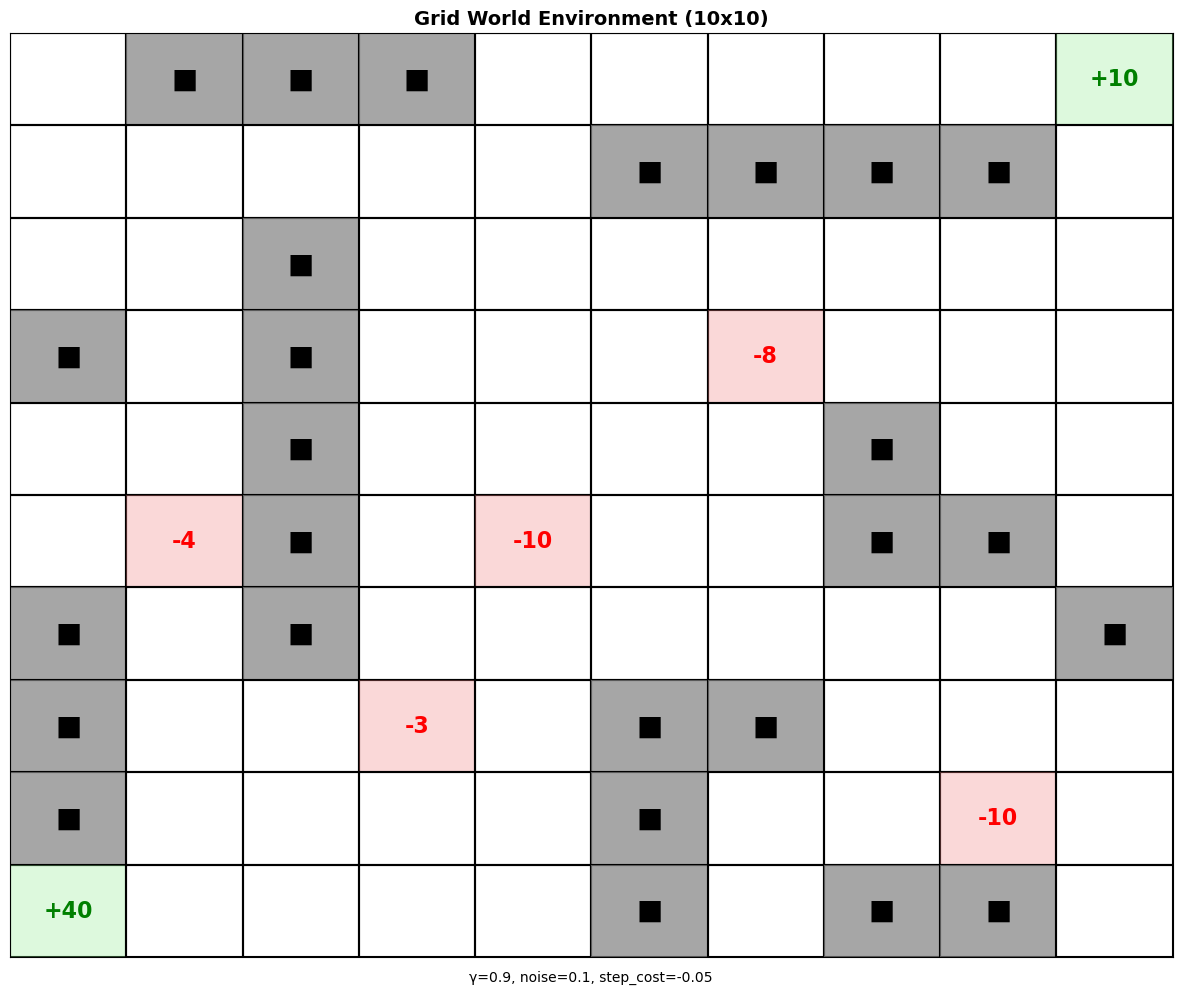

In [5]:
ROWS = 10
COLS = 10
GAMMA = 0.9
NOISE = 0.1
STEP_COST = -0.05
FORMULA_TYPE = 'BERKELEY'

# Create 10x10 environment
custom_env = GridWorldMDP(
    rows=ROWS,
    cols=COLS,
    gamma=GAMMA,
    noise=NOISE,
    step_cost=STEP_COST
)

# Multiple goal states (positive rewards)
goals = {
    (0, 9): +10,
    (9, 0): +40,
}

# Multiple traps (negative rewards)
traps = {
    (3, 6): -8,
    (7, 3): -3,
    (8, 8): -10,
    (5, 1): -4,
    (5, 4): -10,
}

# Combine all terminal states
all_terminals = {**goals, **traps}

# Obstacles (walls) - creating maze-like structures
obstacles = {
    (2, 2), (3, 2), (4, 2), (5, 2), (6, 2),
    (1, 5), (1, 6), (1, 7), (1, 8),
    (7, 5), (7, 6), (8, 5),
    (0, 3), (3, 0), (5, 8), (9, 5), (6, 9),
    (4, 7), (5, 7),
    (0, 1), (0, 2), (9, 7), (9, 8),
    (6, 0), (7, 0), (8, 0)
}

# Set up the environment
custom_env.set_terminals(all_terminals)
custom_env.set_obstacles(obstacles)

# Display the environment structure
custom_env.plot_environment()

Converged in 48 iterations


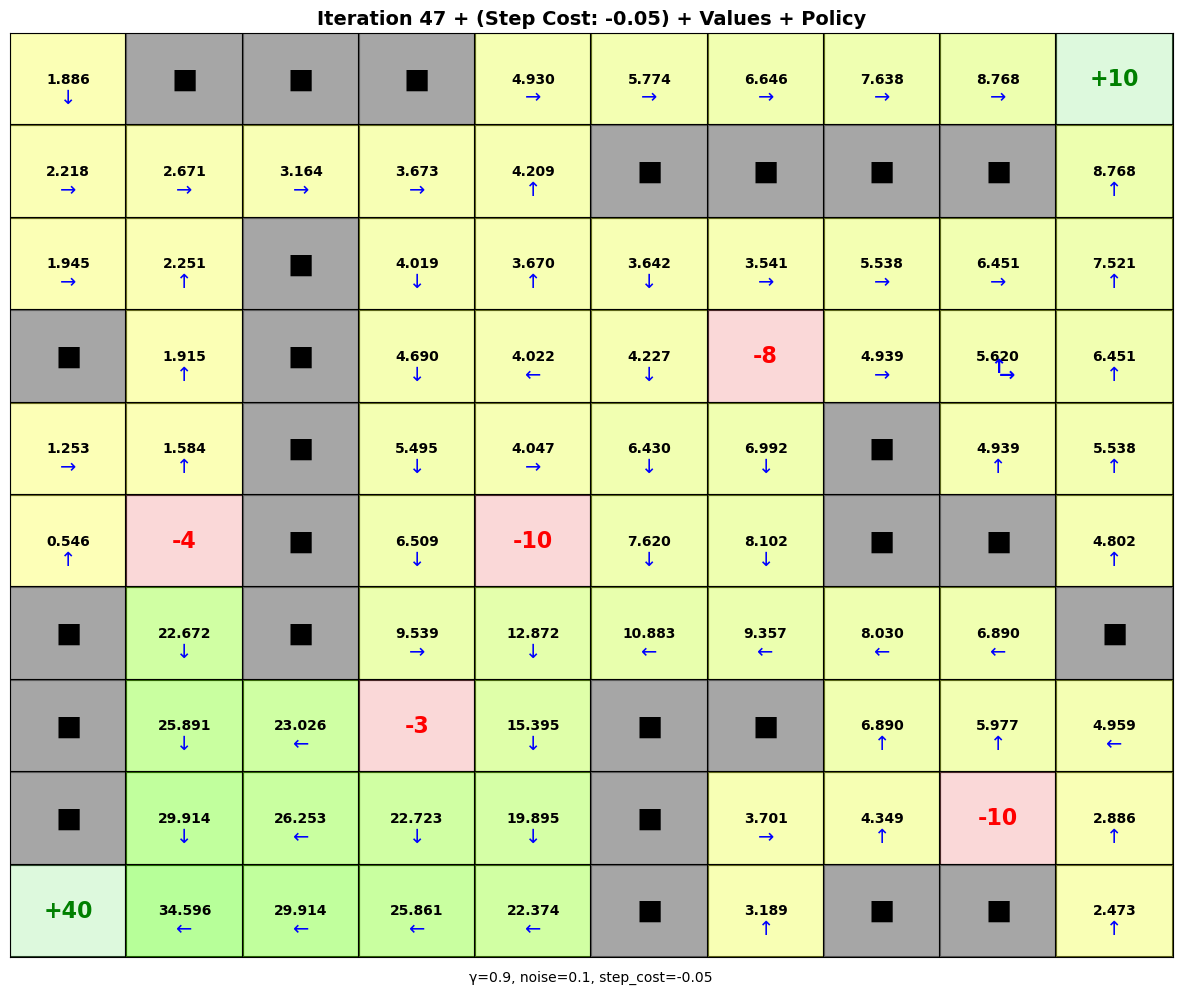

In [6]:
# Run value iteration
iterations = custom_env.value_iteration()
print(f"Converged in {iterations} iterations")

custom_env.plot_iteration(
    iterations-1,
    show_values=True,
    show_policy=True,
    show_qvalues=False
)

# Solving MDPs: Value and Policy Iteration

## Using Berkeley Formula 

```
Q = R(s) + γ * Σ P(s'|s,a) * V(s')
```

In [7]:
# Create the classic grid world and launch interactive widgets
env = create_classic_gridworld_env(formula_type='BERKELEY')
widgets = env.create_visualization_widgets()

Output()

Output()

## Using AIMA Formula 

```
Q = Σ P(s'|s,a) * (R(s,a,s') + γ*V(s'))
```

In [8]:
# Create the classic grid world and launch interactive widgets
env = create_classic_gridworld_env(formula_type='AIMA')
widgets = env.create_visualization_widgets()

Output()

Output()

## Custom Environment

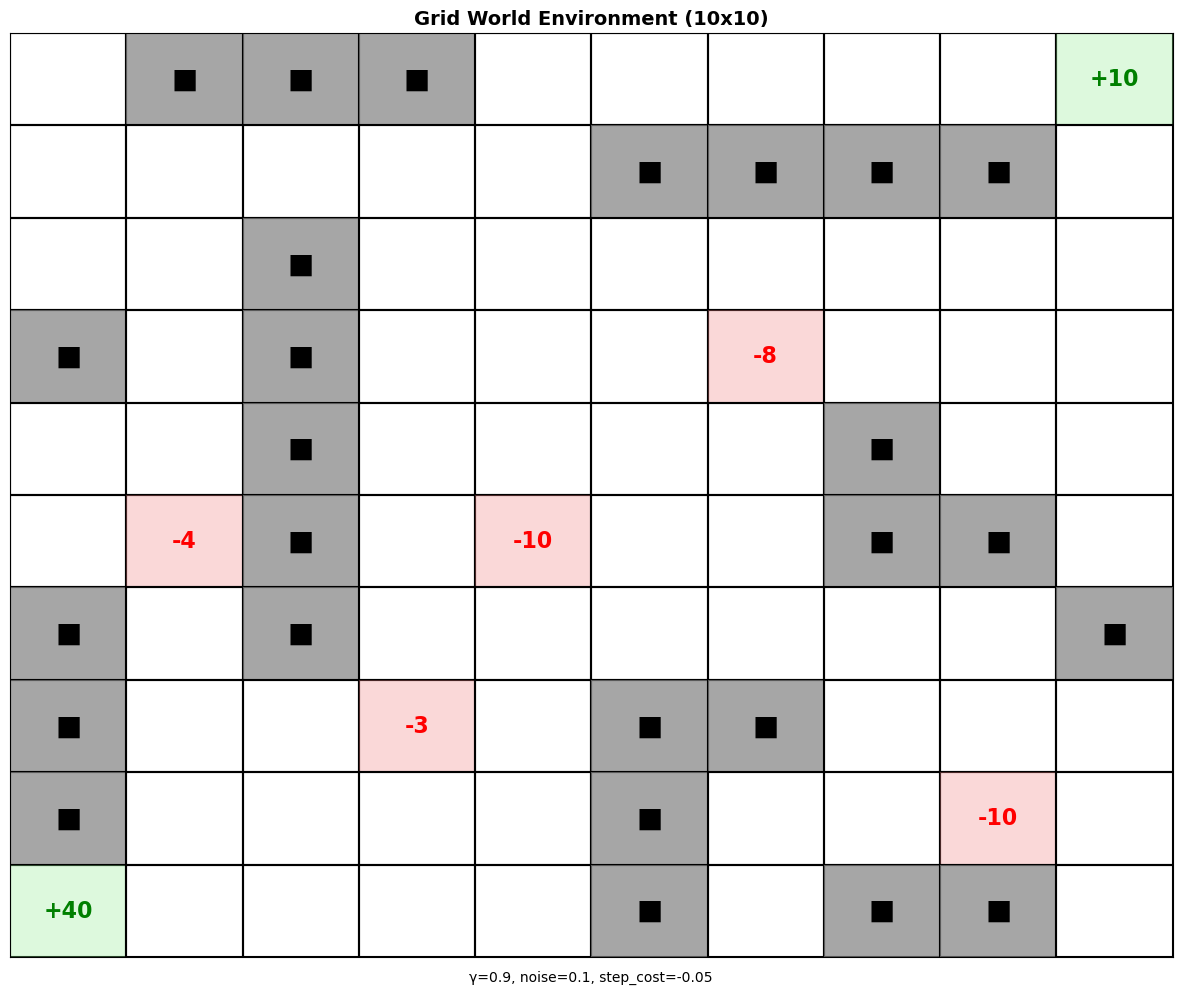

In [9]:
ROWS = 10
COLS = 10
GAMMA = 0.9
NOISE = 0.1
STEP_COST = -0.05
FORMULA_TYPE = 'BERKELEY'

# Create 10x10 environment
custom_env = GridWorldMDP(
    rows=ROWS,
    cols=COLS,
    gamma=GAMMA,
    noise=NOISE,
    step_cost=STEP_COST
)

# Multiple goal states (positive rewards)
goals = {
    (0, 9): +10,
    (9, 0): +40,
}

# Multiple traps (negative rewards)
traps = {
    (3, 6): -8,
    (7, 3): -3,
    (8, 8): -10,
    (5, 1): -4,
    (5, 4): -10,
}

# Combine all terminal states
all_terminals = {**goals, **traps}

# Obstacles (walls) - creating maze-like structures
obstacles = {
    (2, 2), (3, 2), (4, 2), (5, 2), (6, 2),
    (1, 5), (1, 6), (1, 7), (1, 8),
    (7, 5), (7, 6), (8, 5),
    (0, 3), (3, 0), (5, 8), (9, 5), (6, 9),
    (4, 7), (5, 7),
    (0, 1), (0, 2), (9, 7), (9, 8),
    (6, 0), (7, 0), (8, 0)
}

# Set up the environment
custom_env.set_terminals(all_terminals)
custom_env.set_obstacles(obstacles)

# Display the environment structure
custom_env.plot_environment()

In [10]:
widgets = custom_env.create_visualization_widgets()

Output()

Output()

# Class Example for Policy Iteration

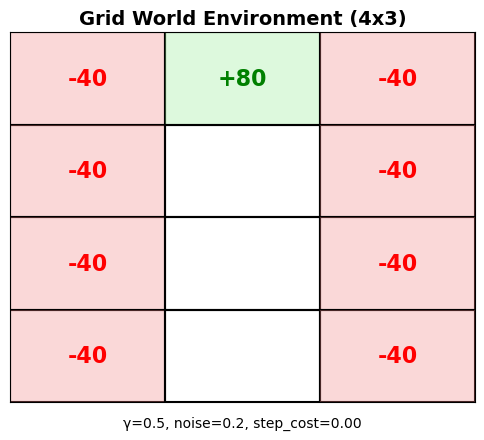

In [11]:
ROWS = 4
COLS = 3
GAMMA = 0.5
NOISE = 0.2
STEP_COST = 0
FORMULA_TYPE = 'BERKELEY'

# Create 10x10 environment
policy_iteration_env = GridWorldMDP(
    rows=ROWS,
    cols=COLS,
    gamma=GAMMA,
    noise=NOISE,
    step_cost=STEP_COST
)

# Multiple goal states (positive rewards)
goals = {
    (0, 1): +80,
}

# Multiple traps (negative rewards)
traps = {
    (0, 0): -40,
    (1, 0): -40,
    (2, 0): -40,
    (3, 0): -40,
    (0, 2): -40,
    (1, 2): -40,
    (2, 2): -40,
    (3, 2): -40,
}

# Combine all terminal states
all_terminals = {**goals, **traps}

# Set up the environment
policy_iteration_env.set_terminals(all_terminals)

# Display the environment structure
policy_iteration_env.plot_environment()

In [12]:
widgets = policy_iteration_env.create_visualization_widgets()

Output()

Output()